# VISUALIZATION

In [258]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## DATASETS
### Socioeconomic Table

In [259]:
socioecon = pd.read_csv("ChicagoSocioecon.csv")
socioecon['Community Area Number'] = pd.to_numeric( socioecon['Community Area Number'], downcast='signed')
socioecon['Community Area Number'] = socioecon['Community Area Number'].fillna(0.0).apply(np.int64)
socioecon['HARDSHIP INDEX'] = socioecon['HARDSHIP INDEX'].fillna(0.0).apply(np.int64)
socioecon = socioecon.set_index('Community Area Number')
socioecon = socioecon.dropna()
socioecon.head()

,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area Number,,,,,,,,
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


### Crime and Population Table

In [260]:
crimes = pd.read_csv("dataFiltered.csv")
population = pd.read_csv("ChicagoPopulation.csv")
population = population.set_index('Community Area Number')
crimes['Year'] = crimes['Year'].fillna(0.0).apply(np.int64)
crime = crimes.groupby('Community Area').count()['ID'].reset_index(name="Crime Count")
crime = crime.join(population, on="Community Area")
crime['Population '] = crime['Population '].fillna(0.0).apply(np.int64)
crime['Community Area'] = crime['Community Area'].fillna(0.0).apply(np.int64)
crime.columns = ['Community Area', 'Crime Count', 'Population']
crime.head()

,Community Area,Crime Count,Population
0,0,9,0
1,1,7748,54991
2,2,6722,71942
3,3,7271,56362
4,4,3537,39493


### Chicago Map

In [261]:
chicago_map = gpd.read_file("geo_export_7740d8e1-a704-49b1-8276-e70c37a786a0.shp")
chicago_map['Community Area Number'] = pd.to_numeric(chicago_map['area_num_1'], downcast='signed')
chicago_map = chicago_map.drop(['comarea', 'comarea_id', 'perimeter', 'area', 'area_numbe', 'area_num_1'], axis=1)
chicago_map = chicago_map.set_index('Community Area Number').sort_values(by="Community Area Number")
chicago_map.head()

,community,shape_area,shape_len,geometry
Community Area Number,,,,
1,ROGERS PARK,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...
2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.6846530946559 42.0194847726953, ..."
3,UPTOWN,6.509564e+07,46972.794555,POLYGON ((-87.64102430213292 41.95480280553257...
4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.6744075678037 41.97610340441675,..."
5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336415409336 41.9323427446535,..."


## Chicago Socioeconomic Map

In [262]:
crime_socioecon = socioecon.join(crime, on='Community Area Number')
crime_socioecon = crime_socioecon.drop(['Community Area', 'COMMUNITY AREA NAME'], axis=1)
crime_socioecon = crime_socioecon.drop([0])
# crime_socioecon.columns = ['PHC', 'PHBP', 'PAUN', 'PAWHS', 'PAU18', 'PCI', 'HI', 'CC', 'POP']
# crime_socioecon

socioecon_map = chicago_map.join(crime_socioecon, on='Community Area Number')
crime_map = chicago_map.join(crime, on='Community Area Number')
crime_map = crime_map.drop(columns=['Community Area'])
socioecon_map.head()

,community,shape_area,shape_len,geometry,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Count,Population
Community Area Number,,,,,,,,,,,,,
1,ROGERS PARK,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,7.7,23.6,8.7,18.2,27.5,23939,39,7748,54991
2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.6846530946559 42.0194847726953, ...",7.8,17.2,8.8,20.8,38.5,23040,46,6722,71942
3,UPTOWN,6.509564e+07,46972.794555,POLYGON ((-87.64102430213292 41.95480280553257...,3.8,24.0,8.9,11.8,22.2,35787,20,7271,56362
4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.6744075678037 41.97610340441675,...",3.4,10.9,8.2,13.4,25.5,37524,17,3537,39493
5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336415409336 41.9323427446535,...",0.3,7.5,5.2,4.5,26.2,57123,6,2945,31867


## [#1] MAP VISUALIZATION

### [VIZ 1.1] Unemployment Rate on various Chicago community areas

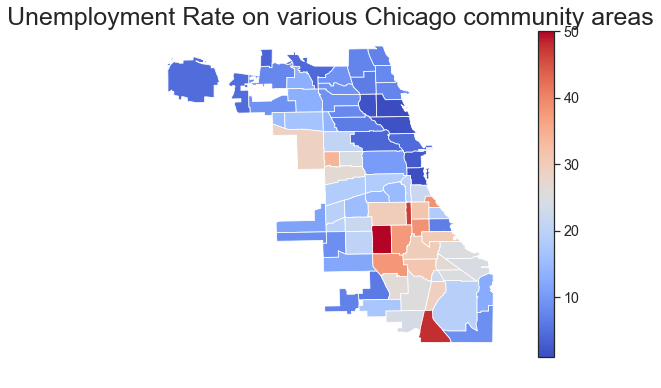

In [263]:
variable = "PERCENT AGED 16+ UNEMPLOYED"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 50

socioecon_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Unemployment Rate on various Chicago community areas", 
             fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### [VIZ1.2] Crime Count per Chicago Community Area

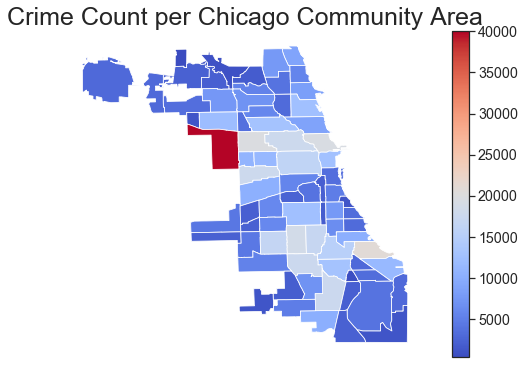

In [264]:
variable = "Crime Count"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 400, 40000

crime_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Crime Count per Chicago Community Area", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### [VIZ1.3] Percentage of Arrests made per Community

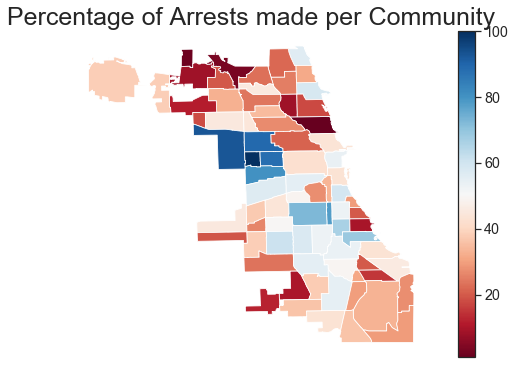

In [265]:
crimes.drop(crime.loc[crime['Community Area']== 0].index, inplace=True)
arrest = crimes.loc[crimes['Arrest'] == True]
arrest = arrest.groupby('Community Area').count()['ID'].reset_index(name="Arrest Count")
arrest['Crime Count'] = crime['Crime Count']
arrest['% Arrests'] = (arrest['Arrest Count'] / arrest['Crime Count']) * 100
arrest['Community Area'] = arrest['Community Area'].fillna(0.0).apply(np.int64)
arrest.dropna()
arrest_map = chicago_map.join(arrest, on='Community Area Number') 

variable = "% Arrests"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 100

arrest_map.plot(column=variable, cmap="RdBu", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Percentage of Arrests made per Community", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

## [#2] BAR PLOT VISUALIZATIONS
### [VIZ 2.1] Socioeconomic Metrics over income-based Chicago neighborhoods

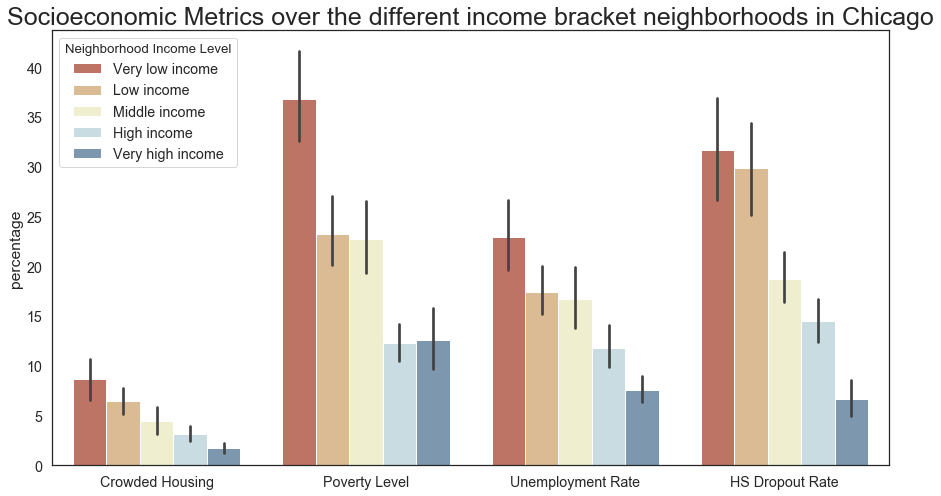

In [266]:
crime_socioecon.columns = ['PHC', 'PHBP', 'PAUN', 'PAWHS', 'PAU18', 'PCI', 'HI', 'CC', 'POP']


def f(row):
    return (row['CC'] / row['POP'])*100

def defineIncomeLevel(row):
    y = row['PCI']
    if y >= 33982.6:   return 4  #TOP 20%
    elif y >= 24018.4: return 3  #UPPER MID 20%
    elif y >= 18527.4: return 2  #MID 20%
    elif y >= 14846.6: return 1  #LOWER MID 20%
    else: return 0 #BOTTOM 20%

crime_socioecon['PCC'] = crime_socioecon.apply(f, axis=1)
crime_socioecon['IL'] = crime_socioecon.apply(defineIncomeLevel, axis=1)

cols = ['PHC', 'PHBP', 'PAUN', 'PAWHS', 'IL'] 

X = crime_socioecon[cols]
X.columns = ['Crowded Housing', 'Poverty Level', 'Unemployment Rate', 
             'HS Dropout Rate', 'IL']
melted_X = X.melt(id_vars=['IL'], var_name='variable', value_name='percentage')

plt.figure(figsize=(15,8))
sns.set_style('white')
plot = sns.barplot(x="variable", y="percentage", hue='IL', data=melted_X,
                   saturation=0.5, palette='RdYlBu')

plot.set_title("Socioeconomic Metrics over the different income bracket neighborhoods in Chicago", 
             fontdict={"fontsize": 25, "fontweight" : 5})
plot.axis_bgcolor='white'
plot.set_xlabel('')
plot.legend_.set_title('Neighborhood Income Level')
labels = ['Very low income', 'Low income', 
          'Middle income', 'High income', 
          'Very high income']
for t, l in zip(plot.legend_.texts, labels): t.set_text(l)


### [VIZ2.2]

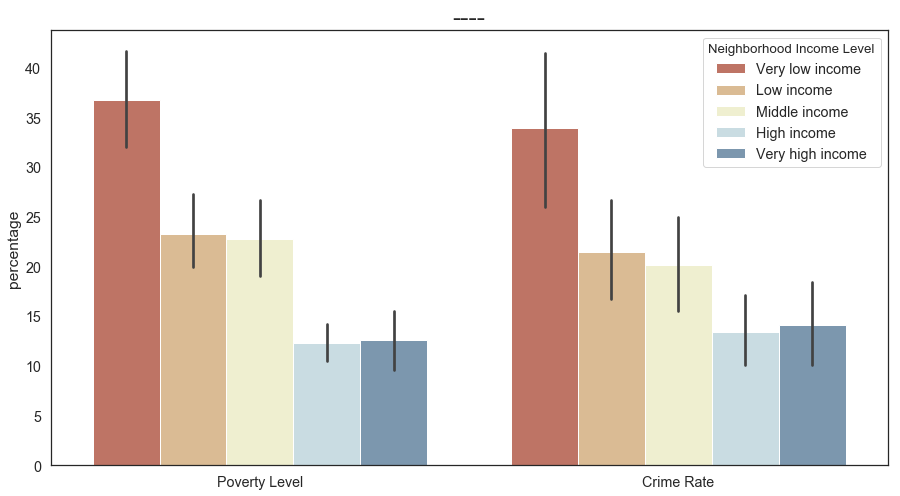

In [267]:
cols = ['PHBP', 'PCC', 'IL'] 

X = crime_socioecon[cols]
X.columns = ['Poverty Level', 'Crime Rate', 'IL']
melted_X = X.melt(id_vars=['IL'], var_name='variable', value_name='percentage')

plt.figure(figsize=(15,8))
sns.set_style('white')
plot = sns.barplot(x="variable", y="percentage", hue='IL', data=melted_X,
                   saturation=0.5, palette='RdYlBu')

plot.set_title("----", 
             fontdict={"fontsize": 25, "fontweight" : 5})
plot.axis_bgcolor='white'
plot.set_xlabel('')
plot.legend_.set_title('Neighborhood Income Level')
labels = ['Very low income', 'Low income', 
          'Middle income', 'High income', 
          'Very high income']
for t, l in zip(plot.legend_.texts, labels): t.set_text(l)

## [#3] JOINT PLOT VISUALIZATIONS

### [VIZ 3.1] Per capita crime v. Per capita income

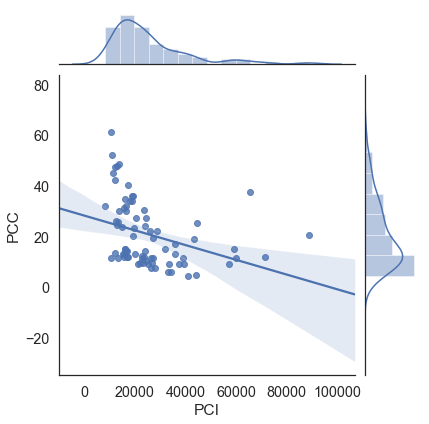

In [268]:
sns.jointplot(x="PCI", y='PCC', data=crime_socioecon, kind='reg')

### [VIZ 3.2] Poverty level v. Per capita crime

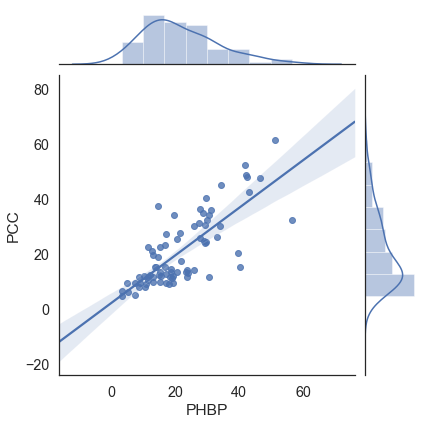

In [269]:
sns.jointplot(x="PHBP", y='PCC', data=crime_socioecon, kind='reg')